#Download the dataset
Run the cell below

In [ ]:
!gdown 1R6heO8EWCG_62-HxYXtiMJxEGu3T8bgh

Downloading...
From: https://drive.google.com/uc?id=1R6heO8EWCG_62-HxYXtiMJxEGu3T8bgh
To: /content/Customer Segmentation.csv
100% 425k/425k [00:00<00:00, 125MB/s]


#Read the dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Customer Segmentation.csv')

In [ ]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


#Visualizations

<Axes: ylabel='Frequency'>

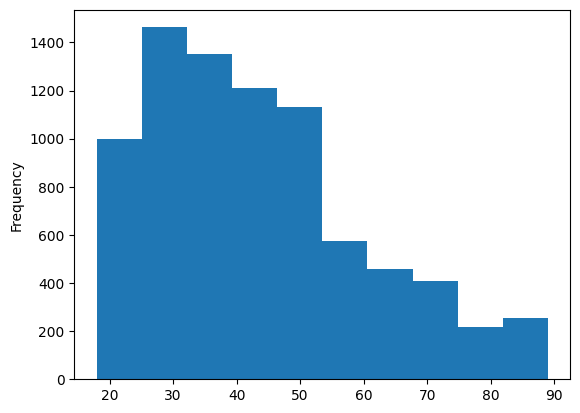

In [ ]:
df.Age.plot.hist()

<Axes: >

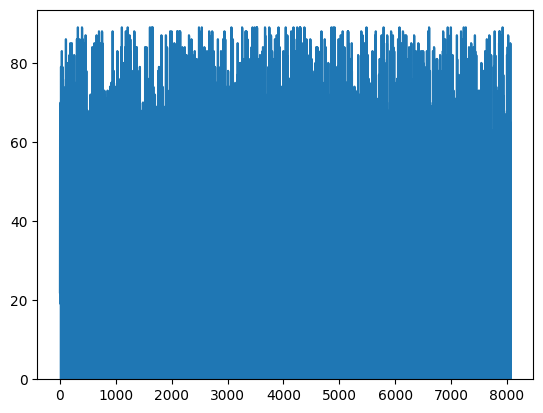

In [ ]:
df.Age.plot.area()

<Axes: >

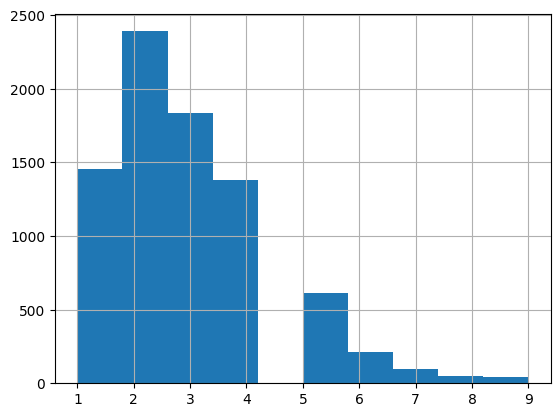

In [ ]:
df.Family_Size.hist()

#Missing Values & Textual data

<Axes: >

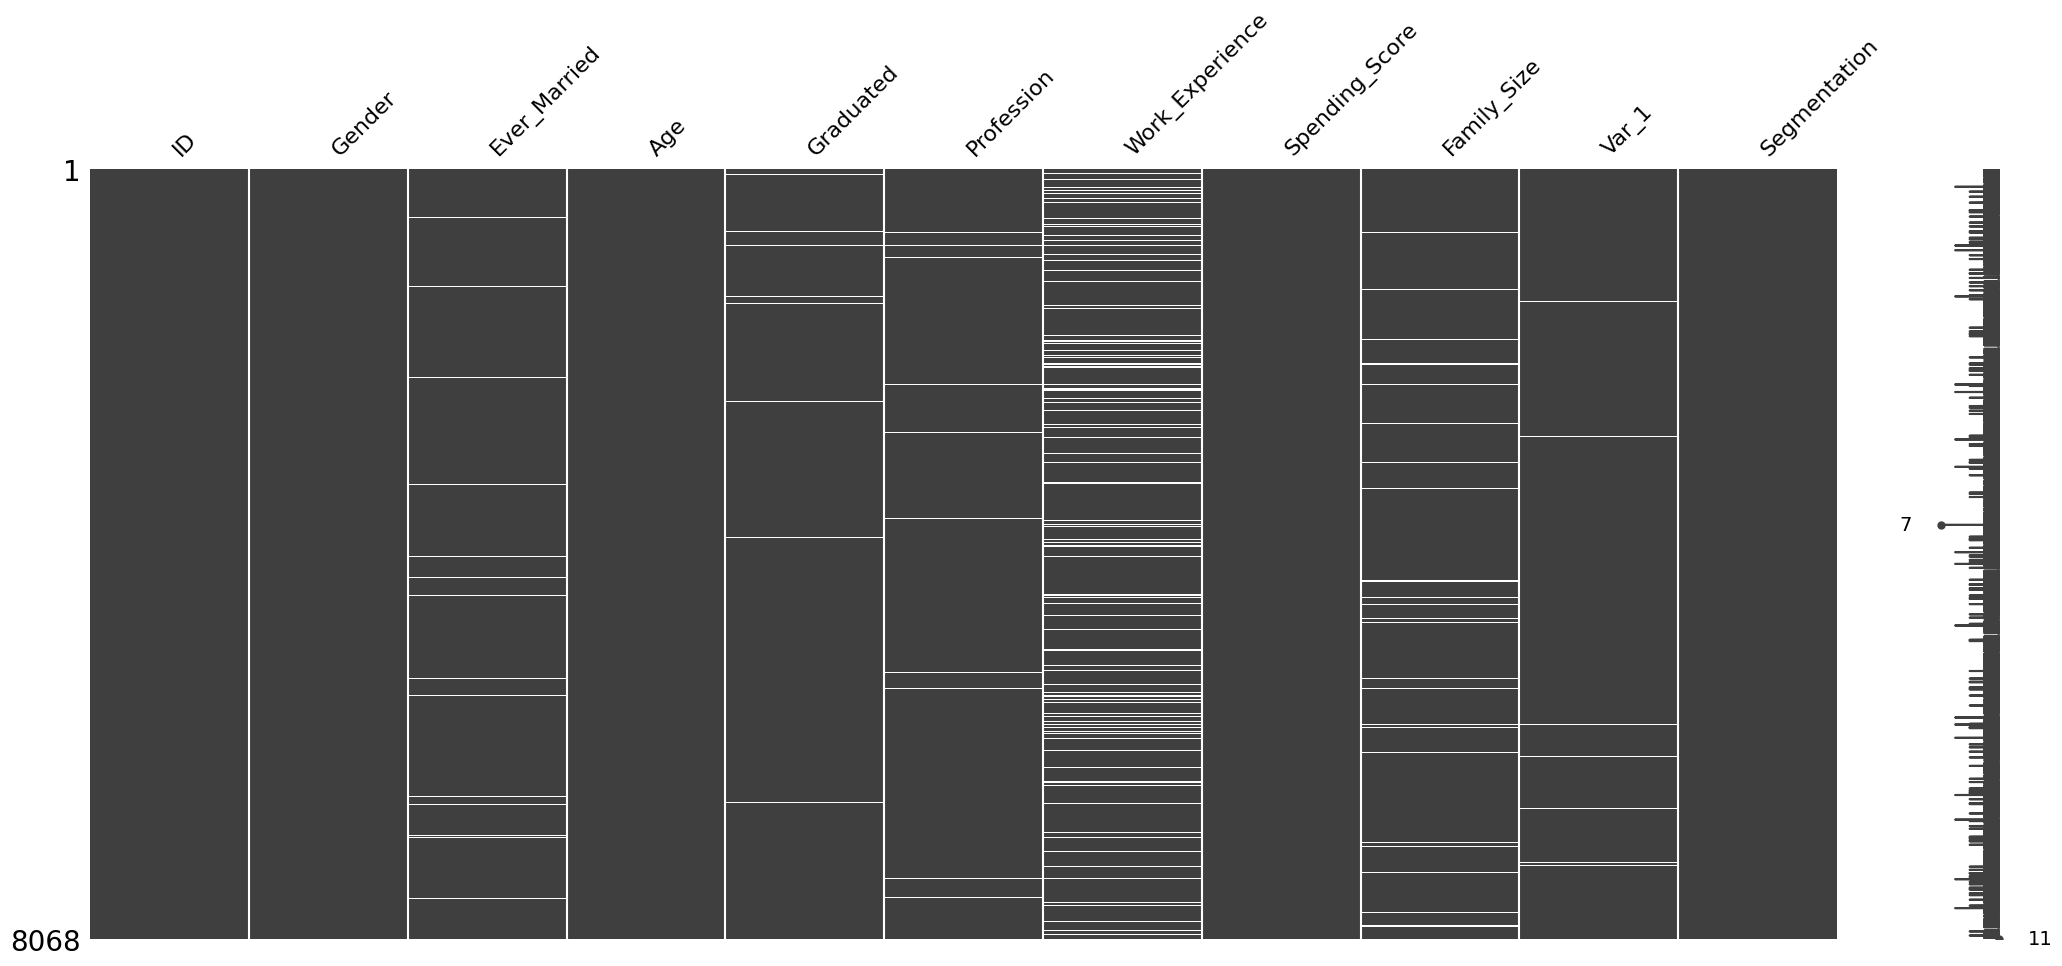

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
tmp=encoder.fit_transform(df.Gender)

In [ ]:
df['Gender']=tmp

In [ ]:
tmp=encoder.fit_transform(df.Ever_Married)
encoder.classes_

array(['No', 'Yes', nan], dtype=object)

In [ ]:
len(encoder.classes_)-1

2

In [ ]:
import numpy as np
lista=[]
for i in tmp:
  if i==2:
    lista.append(np.nan)
  else:
    lista.append(i)

In [ ]:
df['Ever_Married']=lista

In [ ]:
tmp=encoder.fit_transform(df.Graduated)
encoder.classes_

array(['No', 'Yes', nan], dtype=object)

In [ ]:
len(encoder.classes_)-1

2

In [ ]:
import numpy as np
lista=[]
for i in tmp:
  if i==2:
    lista.append(np.nan)
  else:
    lista.append(i)

In [ ]:
df['Graduated']=lista

In [ ]:
tmp=encoder.fit_transform(df.Profession)
encoder.classes_

array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', nan],
      dtype=object)

In [ ]:
len(encoder.classes_)-1

9

In [ ]:
import numpy as np
lista=[]
for i in tmp:
  if i==9:
    lista.append(np.nan)
  else:
    lista.append(i)

In [ ]:
df['Profession']=lista

In [ ]:
tmp=encoder.fit_transform(df.Spending_Score)

In [ ]:
df['Spending_Score']=tmp

In [ ]:
tmp=encoder.fit_transform(df.Var_1)
encoder.classes_

array(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7', nan],
      dtype=object)

In [ ]:
len(encoder.classes_)-1

7

In [ ]:
import numpy as np
lista=[]
for i in tmp:
  if i==7:
    lista.append(np.nan)
  else:
    lista.append(i)

In [ ]:
df['Var_1']=lista

In [ ]:
tmp=encoder.fit_transform(df.Segmentation)

In [ ]:
df['Segmentation']=tmp

In [ ]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0.0,22,0.0,5.0,1.0,2,4.0,3.0,3
1,462643,0,1.0,38,1.0,2.0,NaN,0,3.0,3.0,0
2,466315,0,1.0,67,1.0,2.0,1.0,2,1.0,5.0,1
3,461735,1,1.0,67,1.0,7.0,0.0,1,2.0,5.0,1
4,462669,0,1.0,40,1.0,3.0,NaN,1,6.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0.0,22,0.0,NaN,0.0,2,7.0,0.0,3
8064,464685,1,0.0,35,0.0,4.0,3.0,2,4.0,3.0,3
8065,465406,0,0.0,33,1.0,5.0,1.0,2,1.0,5.0,3
8066,467299,0,0.0,27,1.0,5.0,1.0,2,4.0,5.0,1


<Axes: >

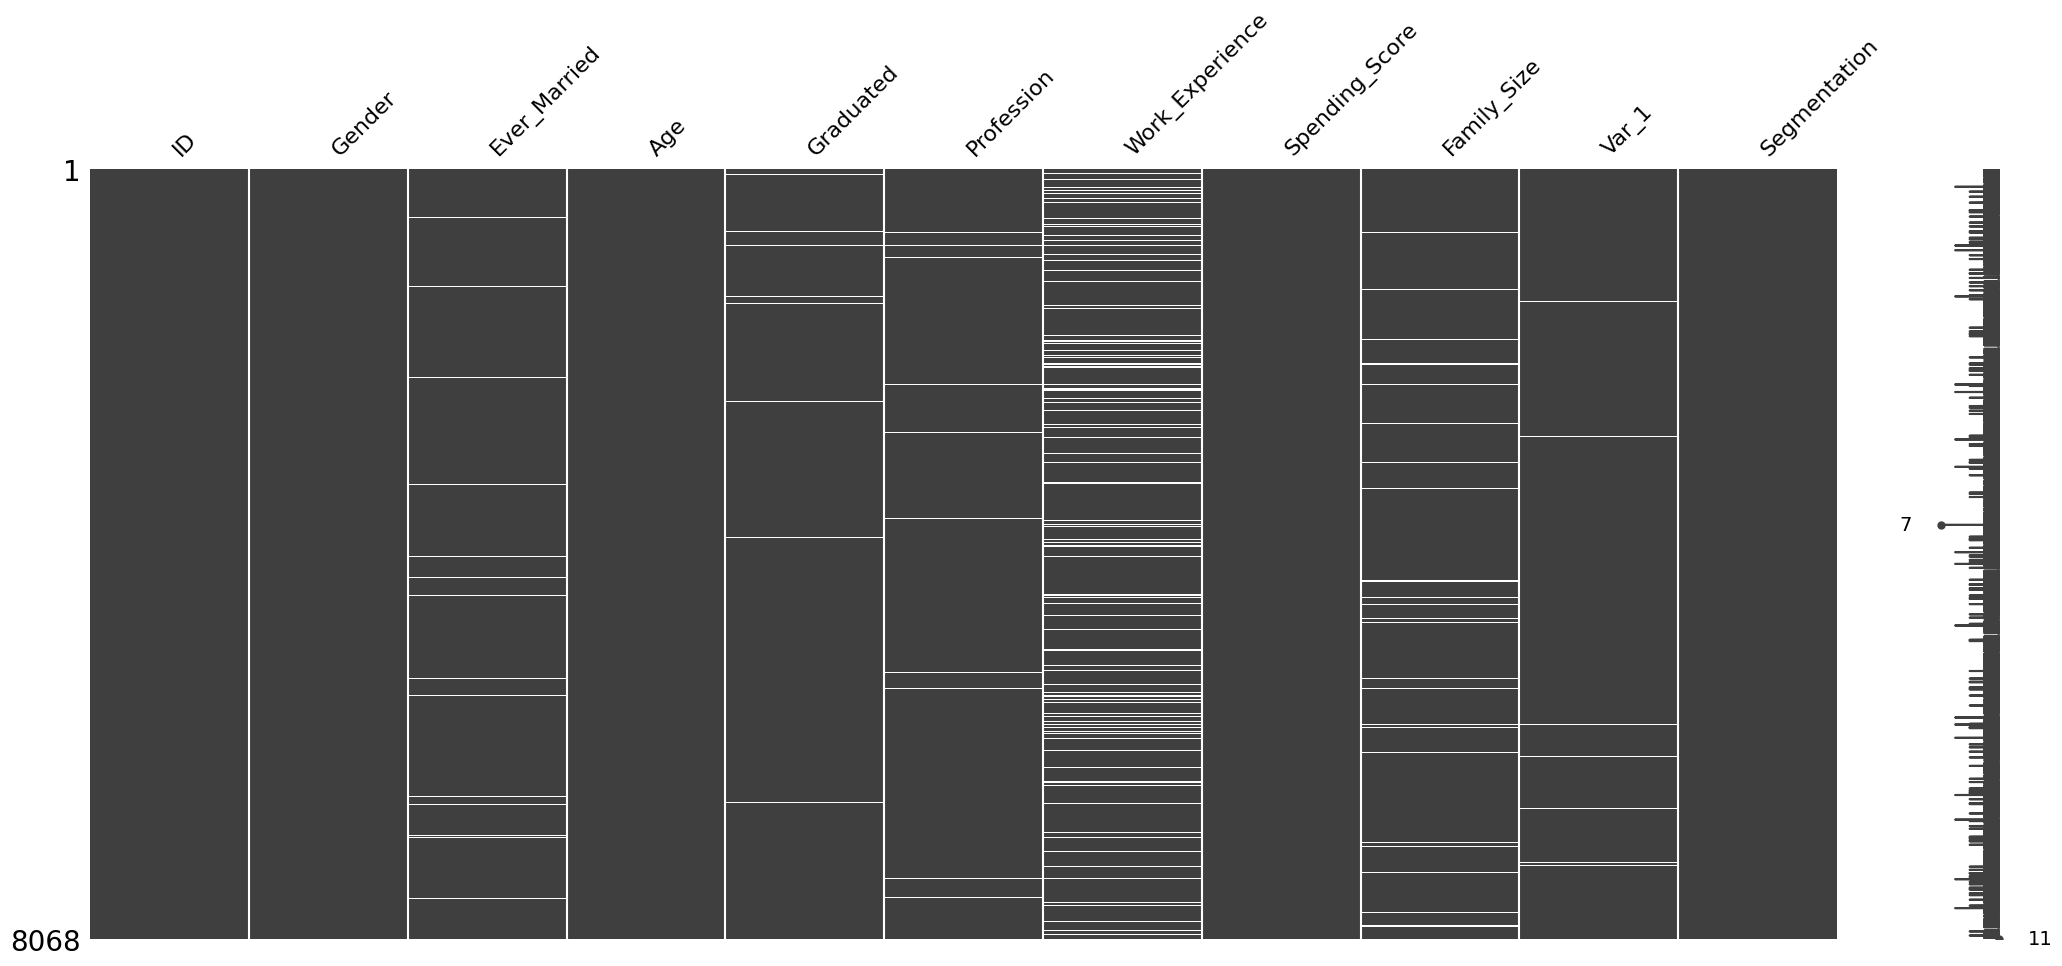

In [ ]:
msno.matrix(df)

In [ ]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

KNNImputer = KNNImputer(n_neighbors=3)
df['Ever_Married'] = KNNImputer.fit_transform(df['Ever_Married'].to_numpy().reshape(-1,1))
df['Graduated'] = KNNImputer.fit_transform(df['Graduated'].to_numpy().reshape(-1,1))

In [ ]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
df['Profession'] = KNNImputer.fit_transform(df['Profession'].to_numpy().reshape(-1,1))
df['Work_Experience'] = KNNImputer.fit_transform(df['Work_Experience'].to_numpy().reshape(-1,1))

In [ ]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
df['Family_Size'] = KNNImputer.fit_transform(df['Family_Size'].to_numpy().reshape(-1,1))
df['Var_1'] = KNNImputer.fit_transform(df['Var_1'].to_numpy().reshape(-1,1))

In [ ]:
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

#Train - test split of the dataset (80:20 ratio)

In [ ]:
Y=df['Segmentation']
X= df[['Gender','Ever_Married','Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

#Model training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

#Model evaluation

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,recall_score

In [ ]:
f1_score(Y_test,y_pred,average='micro')

0.46716232961586124

In [ ]:
f1_score(Y_test,y_pred,average='macro')

0.46086603077617827

In [ ]:
recall_score(Y_test,y_pred, average='macro')

0.46129009026000495

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.37      0.53      0.44       392
           1       0.33      0.27      0.29       375
           2       0.53      0.47      0.50       404
           3       0.66      0.58      0.62       443

    accuracy                           0.47      1614
   macro avg       0.47      0.46      0.46      1614
weighted avg       0.48      0.47      0.47      1614

